In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import datetime

导入本项目所需要第三方库

In [3]:
table_1 = pd.read_excel('D:/Project/cumcm2018c1.xlsx')
table_2 = pd.read_csv('D:Project/cumcm2018c2.csv', low_memory= False)

导入项目数据

In [4]:
table_1.head(5)

,kh,csrq,xb,djsj
0,c68b20b4,2002-11-02 00:00:00,0.0,2013-05-11 00:00:00.000
1,1ca15332,NaN,0.0,2004-11-04 16:31:52.436
2,a37cc182,1967-02-17 00:00:00,0.0,2004-12-31 21:24:34.216
3,2ab88539,1982-06-01 00:00:00,0.0,2010-11-19 00:00:00.000
4,b4c77269,1964-02-05 00:00:00,0.0,2007-12-14 00:00:00.000


In [5]:
table_2.head(5)

,kh,dtime,spbm,sl,sj,je,spmc,jf,syjh,djh,gzbm,gzmc
0,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,290.0,270.20,兰芝化妆品正价瓶,270.20,6,25bb,8077.0,兰芝柜
1,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,325.0,302.80,兰芝化妆品正价瓶,302.80,6,25bb,8077.0,兰芝柜
2,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,195.0,181.80,兰芝化妆品正价瓶,181.80,6,25bb,8077.0,兰芝柜
3,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,270.0,251.55,兰芝化妆品正价瓶,251.55,6,25bb,8077.0,兰芝柜
4,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,2,245.0,456.55,兰芝化妆品正价瓶,456.55,6,25bb,8077.0,兰芝柜


In [6]:
table_1.shape,table_2.shape

((194760, 4), (1893532, 12))

In [7]:
table_1_qc = table_1.drop_duplicates(subset ='kh',keep = 'first',inplace = False )
data_1 = table_1_qc.dropna(axis= 0, how='any',subset= None, inplace= False)
data_2 = table_2.dropna(axis=0,how='any',subset=['dtime'],inplace=False)

对会员信息表进行去除空值和重复值，销售流水表中去除购物时间空值。

In [8]:
data = pd.merge(data_1,data_2, how='outer', on='kh')
data.to_excel('D:Project/task1.xlsx')

将表1和表2连接，连接方式采用外连接，并导出为task1

In [9]:
feihuiyuan = data[data['kh'].isnull()] 
huiyuan = data[~data['kh'].isnull()]
feihuiyuan.shape,huiyuan.shape

((1017486, 15), (988590, 15))

将合并后的表拆分为会员表和非会员表。

F:\anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


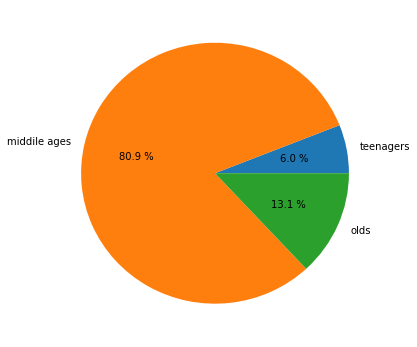

In [11]:
huiyuan_age = huiyuan[~huiyuan['csrq'].isnull()]
def get_year(birth_str):
    birth_str = str(birth_str).strip().split(' ')[0]
    try:
        birth = datetime.datetime.strptime(birth_str, '%Y-%m-%d')
    except:
        birth = datetime.datetime.strptime(birth_str, '%Y/%m/%d')
    age = 2020 - birth.year
    return age
huiyuan_age['age'] = huiyuan_age.csrq.apply(lambda obj: get_year(obj))
youth = huiyuan_age[huiyuan_age['age'] <= 30]
mid = huiyuan_age[huiyuan_age['age'].isin(range(30, 60))]
old = huiyuan_age[huiyuan_age['age'] >= 60]
plt.figure(figsize=(6, 6))
num_list = [youth.shape[0], mid.shape[0], old.shape[0]]
name_list = ['teenagers', 'middile ages', 'olds']
plt.pie(x = num_list, labels = name_list, autopct = '%3.1f %%')
plt.savefig('D:/Project/年龄占比.png')
plt.show()

通过出生日期计算会员年龄，并以30，60岁为界将会员年龄划分为青年、中年和老年。

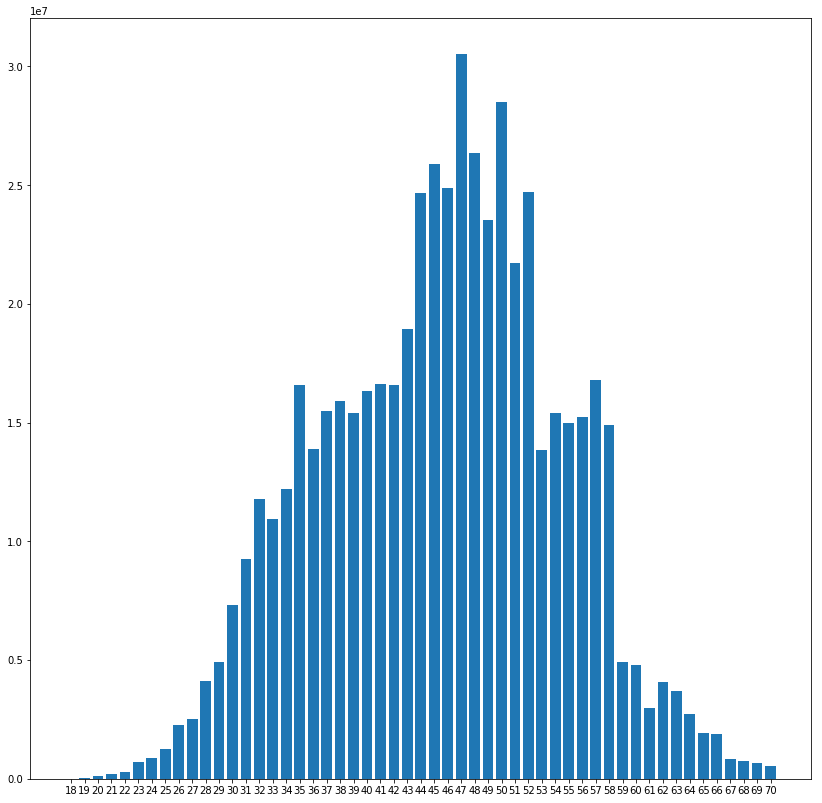

In [12]:
huiyuan_age_inrange = huiyuan_age[huiyuan_age['age'].isin(range(18,71))]
huiyuan_age_je = huiyuan_age_inrange['je'].groupby(huiyuan_age_inrange['age']).sum()
plt.figure(figsize=(14, 14)) 
name_list = huiyuan_age_je.index
num_list = huiyuan_age_je.values
plt.xticks(name_list)
plt.bar(name_list, num_list, tick_label=name_list)
plt.savefig('D:/Project/不同年龄消费金额.png')
plt.show()

针对会员用户统计不同年龄的消费金额。

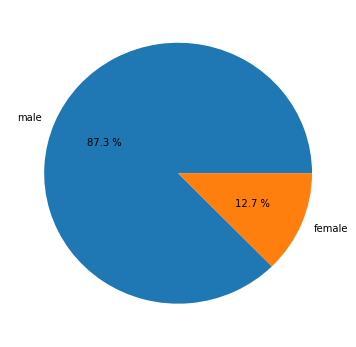

In [13]:
sex_number_group = np.array(huiyuan['xb'].value_counts())
plt.figure(figsize=(6, 6))
num_list = sex_number_group
name_list = ['male', 'female']
plt.pie(x = num_list, labels = name_list, autopct = '%3.1f %%')
plt.savefig('D:/Project/会员性别人数比例.png')
plt.show()

根据会员男女人数计算占比并绘制饼图。

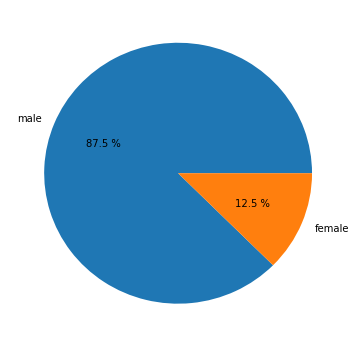

In [14]:
xb_je = huiyuan['je'].groupby(huiyuan['xb']).sum()
plt.figure(figsize=(6, 6))
name_list = ['male', 'female']
num_list = xb_je.values
plt.pie(x=num_list, labels=name_list, autopct='%3.1f %%')
plt.savefig('D:/Project/不同性别会员消费金额.png')
plt.show()

根据会员性别统计消费金额比例并绘制饼图。

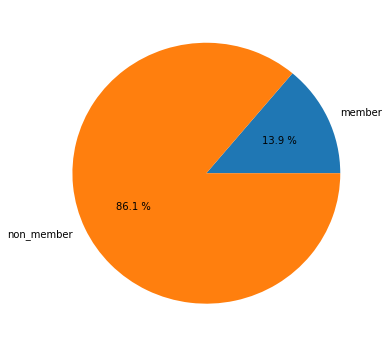

In [15]:
huiyuan_djh = huiyuan['djh'].unique()
feihuiyuan_djh = feihuiyuan['djh'].unique()
plt.figure(figsize=(6, 6))
num_list = [len(huiyuan_djh), len(feihuiyuan_djh)]
name_list = ['member', 'non_member']
plt.pie(x=num_list, labels=name_list, autopct='%3.1f %%')
plt.savefig('D:/Project/会员与非会员订单数比例.png')
plt.show()

根据‘djh’字段分别统计会员与非会员订单，并绘制饼图

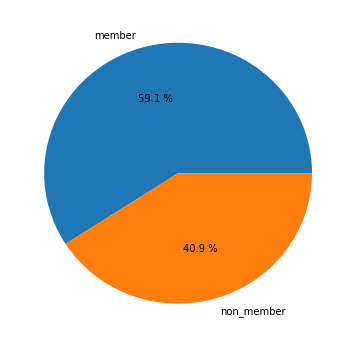

In [16]:
huiyuan_je = huiyuan['je'].sum()
feihuiyuan_je = feihuiyuan['je'].sum()
plt.figure(figsize=(6, 6))
num_list = [huiyuan_je, feihuiyuan_je]
name_list = ['member', 'non_member']
plt.pie(x=num_list, labels=name_list, autopct='%3.1f %%')
plt.savefig('D:/Project/会员与非会员消费金额比例.png')
plt.show()

分别统计会员与非会员的消费金额，并绘制饼图。

F:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


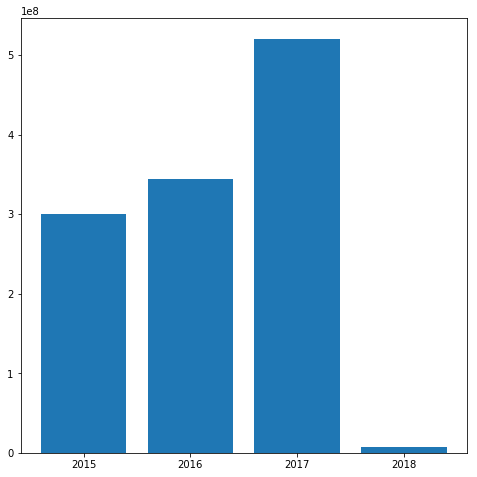

In [17]:
huiyuan['year'] = pd.to_datetime(huiyuan['dtime']).dt.year
huiyuan_yearqc = huiyuan.dropna(axis=0,how='any',subset=['dtime'],inplace=False)
huiyuan_yearqc = huiyuan_yearqc.astype({'year':'int'})
huiyuan_year = huiyuan_yearqc['je'].groupby(huiyuan_yearqc['year']).sum()
plt.figure(figsize=(8, 8)) 
name_list = huiyuan_year.index
num_list = huiyuan_year.values
plt.xticks(name_list)
plt.bar(name_list, num_list, tick_label=name_list)
plt.savefig('D:/Project/不同年份会员消费金额.png')
plt.show()

分别统计不同年份的会员消费金额，并绘制柱形图。

F:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


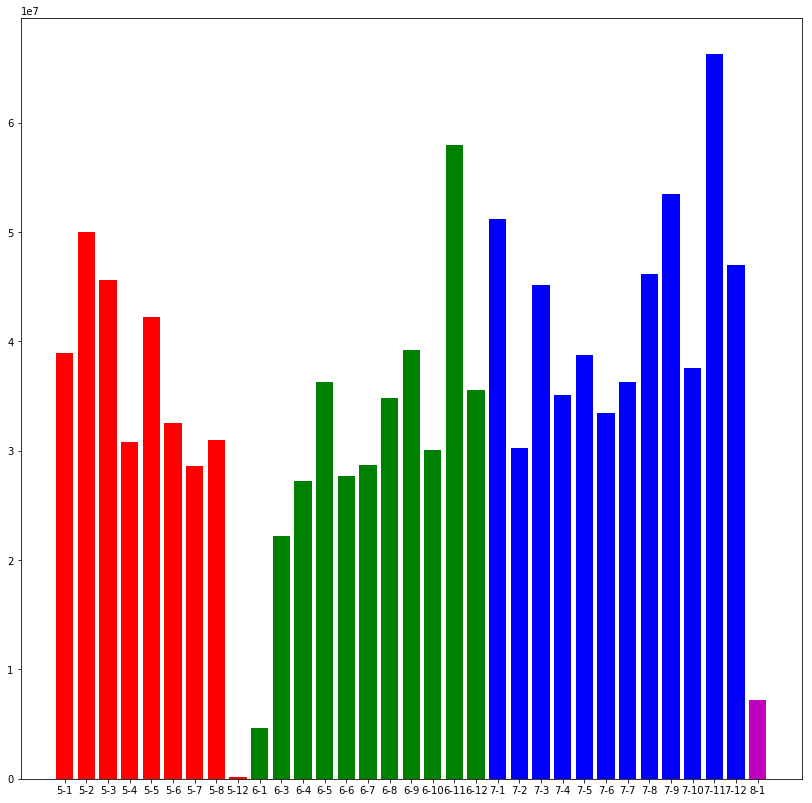

In [19]:
huiyuan['month'] = pd.to_datetime(huiyuan['dtime']).dt.month
huiyuan_monthqc = huiyuan.dropna(axis=0,how='any',subset=['dtime'],inplace=False)
huiyuan_monthqc = huiyuan_monthqc.astype({'year':'int','month':'int'})
huiyuan_month = huiyuan_monthqc['je'].groupby([huiyuan_monthqc['year'], huiyuan_monthqc['month']])
h_m_s = huiyuan_month.sum()
values = h_m_s.values
indexs = ['''{}-{}'''.format(ele[0], ele[1]) for ele in list(h_m_s.index)]
plt.figure(figsize=(14, 14)) 
name_list = indexs
num_list = values
names = []
colors = []
for i in name_list:
    i = i.split('-')
    names.append(i[0][-1] +'-'+ i[1])
    color_map = {
        '2015' : 'r',
        '2016' : 'g',
        '2017' : 'b',
        '2018' : 'm'
    }
    colors.append(color_map[i[0]]) 
plt.bar(names, num_list, color=colors)
plt.savefig('D:/Project/不同月份会员金额.png')
plt.show()

分别按月份统计会员消费金额，观察会员消费时间偏好。

In [22]:
huiyuan['hour'] = pd.to_datetime(huiyuan['dtime']).dt.hour
huiyuan_hourqc = huiyuan.dropna(axis=0,how='any',subset=['dtime'],inplace=False)
huiyuan_hourqc = huiyuan_hourqc.astype({'year':'int','month':'int','hour':'int'})
def shijianduan(s):
    if s.hour >= 0 and s.hour<= 6:
        return 'dawn'
    if s.hour > 6 and s.hour <= 11:
        return 'morning'
    if s.hour > 11 and s.hour <= 14:
        return 'noon'
    if s.hour > 14 and s.hour <= 19:
        return 'afternoon'
    if s.hour > 19 and s.hour <= 24:
        return 'evening'
huiyuan_hourqc['shijianduan'] = huiyuan_hourqc.apply(
    lambda obj: shijianduan(obj))
sjd = huiyuan_hourqc.groupby(huiyuan_hourqc['shijianduan'])
num_list = sjd.count().kh.values
indexs = sjd.count().kh.index.tolist()
plt.figure(figsize=(12, 12))
plt.bar(indexs, num_list)
plt.show()

AttributeError: 'float' object has no attribute 'strip'

将每天划分为5个时间段，统计会员在一天中的消费时间偏好。

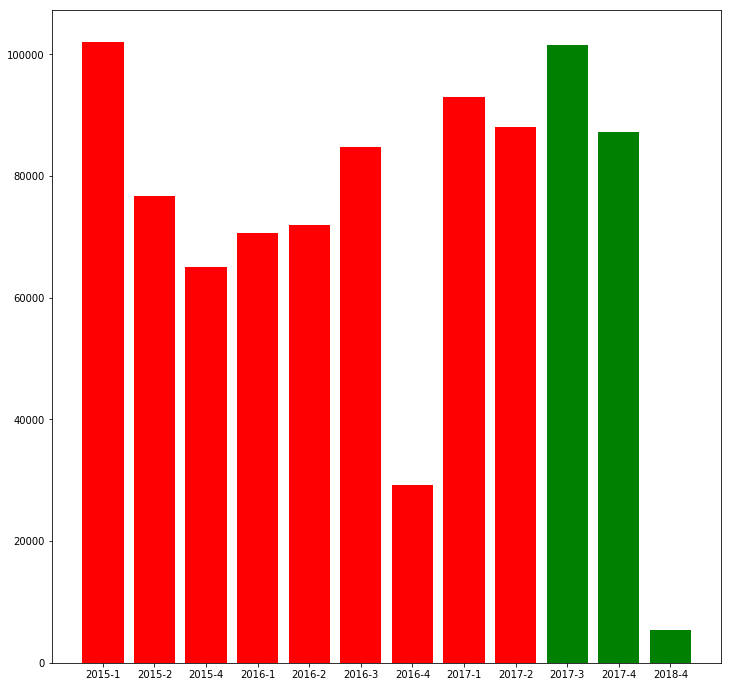

In [26]:
def jidu(month):
    if month in range(3, 6):
        return 1
    if month in range(6, 9):
        return 2
    if month in range(9, 12):
        return 3
    if month in [12,1,2]:
        return 4
huiyuan_hourqc['jidu'] = huiyuan_hourqc['month'].apply(jidu)
huiyuan_jidu = huiyuan_hourqc.groupby([huiyuan_hourqc['year'], huiyuan_hourqc['jidu']])
h_j_s = huiyuan_jidu.count().kh
values = h_j_s.values
indexs = ['''{}-{}'''.format(ele[0], ele[1]) for ele in list(h_j_s.index)]
plt.figure(figsize=(12, 12))
colors = []
for i in name_list:
    i = i.split('-')
    names.append(i[0][-1] +'-'+ i[1])
    color_map = {
        '2015' : 'r',
        '2016' : 'g',
        '2017' : 'b',
        '2018' : 'm'
    }
    colors.append(color_map[i[0]]) 
plt.bar(indexs, values, color=colors)
plt.savefig('D:/Project/各季度会员消费人数.png')
plt.show()

绘制不同季度会员消费金额图。

In [27]:
huiyuan_hourqc.head(100)

,kh,csrq,xb,djsj,dtime,spbm,sl,sj,je,spmc,jf,syjh,djh,gzbm,gzmc,year,month,hour,jidu
1,a37cc182,1967-02-17 00:00:00,0.0,2004-12-31 21:24:34.216,2016-09-25 10:49:14.016,d62a69e3,1.0,499.0,297.07,WMF D无,297.08,101.0,7cd8,7296.0,WMF 柜,2016,9,10,3
2,a37cc182,1967-02-17 00:00:00,0.0,2004-12-31 21:24:34.216,2016-09-25 10:49:14.016,d62a69e3,1.0,12288.0,11089.93,WMF D无,11089.92,101.0,7cd8,7296.0,WMF 柜,2016,9,10,3
3,a37cc182,1967-02-17 00:00:00,0.0,2004-12-31 21:24:34.216,2017-02-28 17:17:35.533,252403ef,1.0,598.0,598.00,双立人商品 F无,598.00,102.0,ed0a,7242.0,双立人柜,2017,2,17,4
7,34c2dc93,1986-07-18 00:00:00,0.0,2007-04-19 00:00:00.000,2017-11-13 13:36:45.656,4708e0bb,1.0,260.0,260.00,植村秀三色眼影/眼线液/眉笔.,260.00,97.0,c3f4,8156.0,Shu Uemura,2017,11,13,3
10,828aa9b4,1951-12-29 00:00:00,0.0,2004-09-24 16:39:08.716,2017-05-17 11:30:39.080,a4809307,1.0,1288.0,1288.00,酷彩F件,1288.00,102.0,95b0,7300.0,Le Creuset(酷彩),2017,5,11,1
11,828aa9b4,1951-12-29 00:00:00,0.0,2004-09-24 16:39:08.716,2017-07-29 18:32:24.720,265cf63a,1.0,1378.0,1378.00,InsunF件,1378.00,259.0,aecd,4337.0,INSUN,2017,7,18,2
12,828aa9b4,1951-12-29 00:00:00,0.0,2004-09-24 16:39:08.716,2017-07-29 18:36:06.720,265cf63a,1.0,823.0,823.00,InsunF件,823.00,259.0,c0f8,4337.0,INSUN,2017,7,18,2
13,828aa9b4,1951-12-29 00:00:00,0.0,2004-09-24 16:39:08.716,2017-07-29 18:36:06.720,265cf63a,1.0,378.0,378.00,InsunF件,378.00,259.0,c0f8,4337.0,INSUN,2017,7,18,2
14,828aa9b4,1951-12-29 00:00:00,0.0,2004-09-24 16:39:08.716,2017-07-29 18:36:06.720,265cf63a,1.0,778.0,778.00,InsunF件,778.00,259.0,c0f8,4337.0,INSUN,2017,7,18,2
15,828aa9b4,1951-12-29 00:00:00,0.0,2004-09-24 16:39:08.716,2017-07-29 18:36:06.720,265cf63a,1.0,518.0,518.00,InsunF件,518.00,259.0,c0f8,4337.0,INSUN,2017,7,18,2


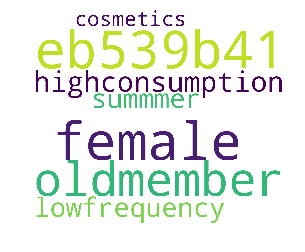

In [29]:
huiyuan_hourqc.loc[159:166,:]
from wordcloud import WordCloud
f = open('D:Project/用户画像.txt','r').read()
wordcloud = WordCloud(background_color="white",width=1000, height=860, margin=2).generate(f)
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('test.png')

通过预览会员购物信息选定某一用户并确定用户画像并进行可视化。

In [30]:
rfm_data = data_2[['kh','dtime','je']]
rfm_data.head(100)
r = rfm_data.groupby('kh')['dtime'].max().reset_index()
r['dtime']=pd.to_datetime(r['dtime'])
r['R']= (pd.to_datetime('2018/1/4',format='%Y/%m/%d') - r['dtime']).dt.days
r = r[['kh','R']]
r.head()

,kh,R
0,000186fa,101
1,000234ad,63
2,0002adb8,552
3,000339f1,18
4,0003a4e7,1056


计算R

In [31]:
rfm_data['day']= rfm_data['dtime'].astype(str).str[:10]
dup_f = rfm_data.groupby(['kh','day'])['dtime'].count().reset_index()
f = dup_f.groupby('kh')['dtime'].count().reset_index()
f.columns=['kh','F']
f.head()

F:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,kh,F
0,000186fa,4
1,000234ad,5
2,0002adb8,1
3,000339f1,7
4,0003a4e7,1


计算F

In [32]:
sum_m =rfm_data.groupby('kh')['je'].sum().reset_index()
sum_m.columns=['kh','je_sum']
com_m =pd.merge(sum_m,f,on='kh',how='inner')
com_m['M']=com_m['je_sum']/3
com_m.head()

,kh,je_sum,F,M
0,000186fa,11880.7,4,3960.233333
1,000234ad,12850.0,5,4283.333333
2,0002adb8,7136.0,1,2378.666667
3,000339f1,6340.8,7,2113.600000
4,0003a4e7,1219.0,1,406.333333


计算M

In [33]:
rfm = pd.merge(r,com_m,on='kh',how='inner')
rfm = rfm[['kh','R','F','M']]
rfm.head()

,kh,R,F,M
0,000186fa,101,4,3960.233333
1,000234ad,63,5,4283.333333
2,0002adb8,552,1,2378.666667
3,000339f1,18,7,2113.600000
4,0003a4e7,1056,1,406.333333


合并

In [34]:
def standardscale(data):
    data=(data-data.mean())/data.std()
    return data 
data1=standardscale(rfm['R'])
data2=standardscale(rfm['F'])
data3=standardscale(rfm['M'])
data12 = pd.concat([data1,data2],axis=1)
data123 = pd.concat([data12,data3],axis=1)
data123
rfm_final = pd.concat([rfm['kh'],data123],axis=1)
rfm_final.head(100)

,kh,R,F,M
0,000186fa,-0.909314,0.070943,-0.031272
1,000234ad,-1.016047,0.240502,-0.006883
2,0002adb8,0.357440,-0.437735,-0.150654
3,000339f1,-1.142442,0.579620,-0.170662
4,0003a4e7,1.773060,-0.437735,-0.299532
5,0004bad2,-0.999195,-0.437735,-0.104659
6,000539ab,-1.016047,-0.437735,-0.324265
7,00065bc9,-0.979533,-0.098617,-0.254468
8,0006ea4c,-0.221166,-0.437735,-0.301444
9,00075d60,-0.827860,0.749179,0.990804


对数据进行标准化。

In [35]:
from sklearn.cluster import KMeans
model= KMeans(n_clusters=3,max_iter=100,random_state=0)
result = model.fit(rfm_final[['R','F','M']])
pd.Series(result.labels_).value_counts()
result.cluster_centers_

array([[-0.62103394, -0.04692584, -0.06343223],
       [ 1.24633606, -0.29784151, -0.18846378],
       [-0.922444  ,  4.04735096,  3.22202032]])

通过机器学习中的K-means聚类方法进行聚类分析。

In [36]:
rfm_result=pd.concat([rfm,pd.Series(model.labels_,index=rfm_final.index)],axis=1)
rfm_result.columns=list(rfm.columns)+['type']
rfm_result.head(100)

,kh,R,F,M,type
0,000186fa,101,4,3960.233333,0
1,000234ad,63,5,4283.333333,0
2,0002adb8,552,1,2378.666667,1
3,000339f1,18,7,2113.600000,0
4,0003a4e7,1056,1,406.333333,1
5,0004bad2,69,1,2988.000000,0
6,000539ab,63,1,78.666667,0
7,00065bc9,76,3,1003.333333,0
8,0006ea4c,346,1,381.000000,0
9,00075d60,130,8,17500.666667,0


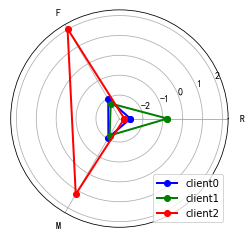

In [38]:
labels = ['R','F','M']
n = 3 
plot_data = result.cluster_centers_
color = ['b', 'g', 'r', 'c'] 
angles = np.linspace(0, 2*np.pi, n, endpoint=False)
plot_data = np.concatenate((plot_data, plot_data[:,[0]]), axis=1) 
angles = np.concatenate((angles, [angles[0]])) 
fig = plt.figure()
ax = fig.add_subplot(111, polar=True) 
for i in range(len(plot_data)):
    ax.plot(angles, plot_data[i], 'o-', color = color[i], label = 'client'+str(i), linewidth=2)
ax.set_rgrids(np.arange(0.01, 5, 1), np.arange(-2, 10, 1), fontproperties="SimHei")
ax.set_thetagrids(angles * 180/np.pi, labels, fontproperties="SimHei")
plt.legend(loc = 4)
plt.savefig('D:/Project/雷达图.png')
plt.show()

绘制聚类雷达图。